In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_cleaning import load_trade
from refreshTime import refresh_time, test_date, resample,synchro_data,harmoniz_data
from Clustering import get_clusters
from GMVP import get_GMVP,Louvain_GMVP,get_profit_vanilla

In [2]:
Date = pd.bdate_range('2010-01-01','2010-12-31')
Market_name = np.array(['AAPL.OQ','AMGN.OQ','AXP.N','BA.N','CAT.N','CSCO.OQ','CVX.N','DOW.N','GS.N','SPY.P','UTX.N','V.N','WMT.N'])

#folder_path = 'D:/GitHub/ML_For_Finance/big data/data/data/'

folder_path ='D:/GitHub/ML for Finance project/ML_For_Finance/big data/Data/data/'
#folder_path = '/Users/franckatteaka/Desktop/cours/Semester III/Financial big data/high freq data/'

In [3]:
aapl = load_trade(Market_name[0],Date[7],folder_path,is_compressed = True)
amgn = load_trade(Market_name[1],Date[7],folder_path,is_compressed = True)
axpn = load_trade(Market_name[2],Date[7],folder_path,is_compressed = True)

In [4]:
test1= [aapl.iloc[:1000],amgn.iloc[:1000],axpn.iloc[:1000]]

In [3]:
test2=[]
for i in range(len(Market_name)):
    data0=load_trade(Market_name[i],Date[101],folder_path,is_compressed = True)
    test2.append(data0)

In [4]:
data1=harmoniz_data(test2)

D:\GitHub\ML for Finance project\ML_For_Finance\big data\Code\refreshTime.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dates = np.array([df.index.drop_duplicates(keep = 'last') for df in dfs])
D:\GitHub\ML for Finance project\ML_For_Finance\big data\Code\refreshTime.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dates = np.array([date[np.where(date > tau[-1])[0]] for date in dates ])


In [5]:
louvain_test = Louvain_GMVP(data1)
louvain_test.get_return(test2,Market_name)
louvain_test.retour

array([-0.00718018])

In [6]:
vanilla_weight,_,_= get_GMVP(data1)
get_profit_vanilla(vanilla_weight,test2)

array([0.01109193])

In [11]:
louvain_test = Louvain_GMVP(data1)
louvain_test.get_profit(test2,Market_name)
louvain_test.profit

array([0.08038539])

In [12]:
vanilla_weight,_,_= get_GMVP(data1)
get_profit_vanilla(vanilla_weight,test2)

array([0.27925532])

In [14]:
sum(vanilla_weight)

1.0000000000000002

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from back_test import daily_back_testing

In [2]:
Date = pd.bdate_range('2010-01-01','2010-12-31')
Market_name = np.array(['AAPL.OQ','AMGN.OQ','AXP.N','BA.N','CAT.N','CSCO.OQ','CVX.N','DOW.N','GS.N','SPY.P','UTX.N','V.N','WMT.N'])

#folder_path = 'D:/GitHub/ML_For_Finance/big data/data/data/'

folder_path ='D:/GitHub/ML for Finance project/ML_For_Finance/big data/Data/data/'
#folder_path = '/Users/franckatteaka/Desktop/cours/Semester III/Financial big data/high freq data/'

In [3]:
backtesting1=daily_back_testing(Market_name,folder_path,Date[1])

In [4]:
backtesting1.daily_update(Date[2])

D:\GitHub\ML for Finance project\ML_For_Finance\big data\Code\refreshTime.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dates = np.array([df.index.drop_duplicates(keep = 'last') for df in dfs])
D:\GitHub\ML for Finance project\ML_For_Finance\big data\Code\refreshTime.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dates = np.array([date[np.where(date > tau[-1])[0]] for date in dates ])


In [5]:
backtesting1.daily_update(Date[3])

D:\GitHub\ML for Finance project\ML_For_Finance\big data\Code\refreshTime.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dates = np.array([df.index.drop_duplicates(keep = 'last') for df in dfs])
D:\GitHub\ML for Finance project\ML_For_Finance\big data\Code\refreshTime.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dates = np.array([date[np.where(date > tau[-1])[0]] for date in dates ])


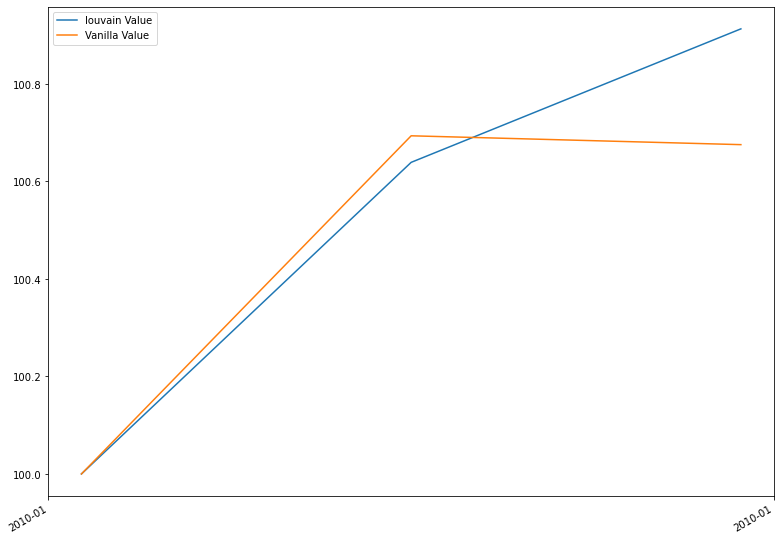

In [6]:
backtesting1.plot_value()

In [7]:
backtesting1.V_louvain

[100, 100.63921285860158, 100.91306004023107]

In [8]:
backtesting1.V_vanilla

[100, 100.69368671131629, 100.67552892929541]

In [9]:
backtesting1.correlation/backtesting1.nombre_test

,AAPL.OQ,AMGN.OQ,AXP.N,BA.N,CAT.N,CSCO.OQ,CVX.N,DOW.N,GS.N,SPY.P,UTX.N,V.N,WMT.N
AAPL.OQ,1.000000,0.157260,0.584309,0.112718,0.116407,0.396457,-0.007697,0.098930,0.365682,0.298617,0.455637,-0.142288,0.581621
AMGN.OQ,0.157260,1.000000,0.561219,0.051508,-0.008258,0.580338,0.397193,0.082197,0.393304,0.461014,0.618767,0.329389,0.574689
AXP.N,0.584309,0.561219,1.000000,0.006100,0.144782,0.777849,0.100520,0.051958,0.566076,0.570705,0.724360,0.301567,0.751690
BA.N,0.112718,0.051508,0.006100,1.000000,0.751131,0.150955,0.796342,0.927960,0.600790,0.585901,0.111144,0.178534,-0.035145
CAT.N,0.116407,-0.008258,0.144782,0.751131,1.000000,0.452038,0.592364,0.708251,0.655019,0.742517,0.188732,0.327254,0.012711
CSCO.OQ,0.396457,0.580338,0.777849,0.150955,0.452038,1.000000,0.304031,0.245414,0.678749,0.780905,0.704258,0.497792,0.577794
CVX.N,-0.007697,0.397193,0.100520,0.796342,0.592364,0.304031,1.000000,0.794222,0.621907,0.713681,0.161520,0.387913,0.002589
DOW.N,0.098930,0.082197,0.051958,0.927960,0.708251,0.245414,0.794222,1.000000,0.668439,0.646372,0.081606,0.295325,-0.115471
GS.N,0.365682,0.393304,0.566076,0.600790,0.655019,0.678749,0.621907,0.668439,1.000000,0.875115,0.386041,0.411616,0.311784
SPY.P,0.298617,0.461014,0.570705,0.585901,0.742517,0.780905,0.713681,0.646372,0.875115,1.000000,0.476364,0.522987,0.294996


In [10]:
backtesting1.louvain_cluster/backtesting1.nombre_test

array([[0. , 0.5, 1. , 1. , 1. , 1. , 1. , 0. , 0.5, 0.5, 0.5, 0.5, 0. ],
       [0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 0. , 0. ],
       [1. , 0.5, 1. , 1. , 1. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 1. , 1. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
       [1. , 0.5, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 1. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])